# Check SED table

In [11]:
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd


In [12]:
from astropy.io import fits

In [13]:
index=107

In [14]:
obj_name='hd158485'
airmass='1.1'
night_name='20160511'

In [15]:
tablefitsfile='SEDPred_'+obj_name+'_'+night_name+'_'+str(index)+'.fits'

In [16]:
hdulist=fits.open(tablefitsfile)
hdulist.info()

Filename: SEDPred_hd158485_20160511_107.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       7   ()              
1                BinTableHDU     18   3729R x 5C   [E, E, E, E, E]   


In [17]:
table_data=hdulist[1].data

In [18]:
wavelength_sed=table_data.field('WAVELENGTH')
flux_sed=table_data.field('SEDcalspec')
flux_sedccd=table_data.field('SEDxQE')
flux_sedccdatm=table_data.field('SEDxQExATM')
flux_sedccdatmopt=table_data.field('SEDxQExATMxTopt')

In [19]:

# rename
SED1=flux_sed             # SED of the star
SED2=flux_sedccd          # SED of star multipled by CCD efficiency 
SED3=flux_sedccdatm       # SED of star multipled by CCD efficiency and atmosphere transparency
SED4=flux_sedccdatmopt    # SED of star multipled by CCD efficiency,atmosphere transparency,
                              # optic throuput

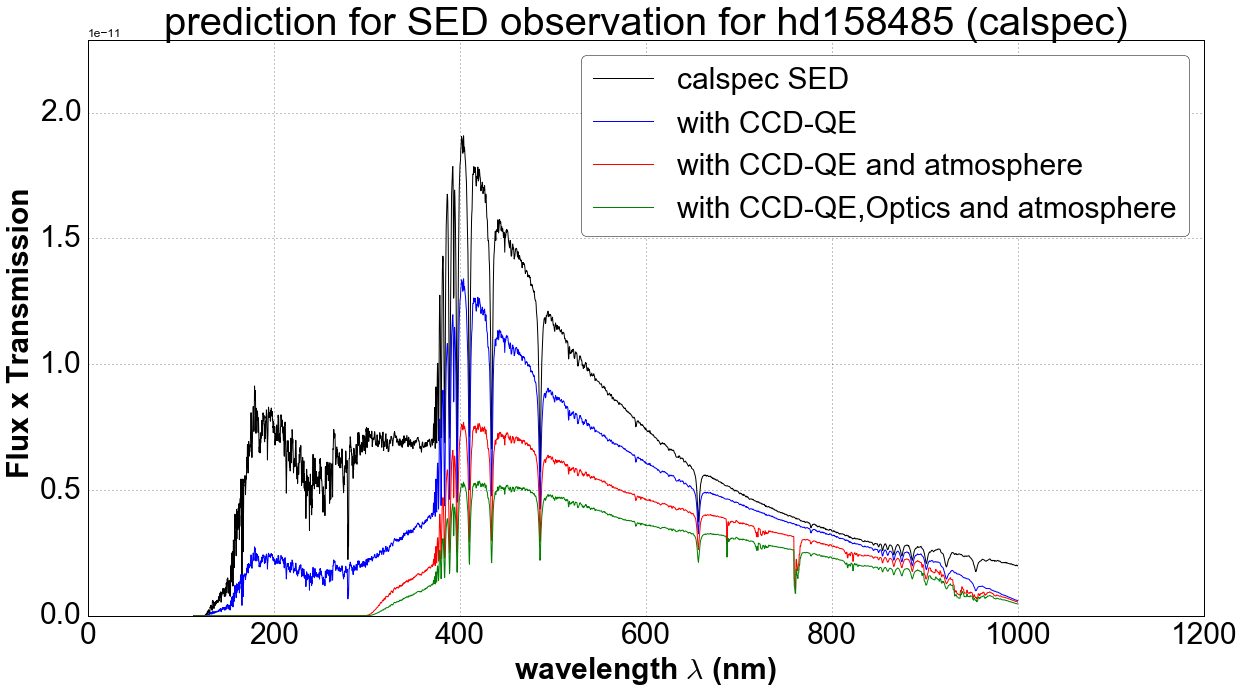

In [20]:
plt.figure(figsize=(20,10))
plt.plot(wavelength_sed,SED1,label='calspec SED',color='k')
plt.plot(wavelength_sed,SED2,label='with CCD-QE',color='b')
plt.plot(wavelength_sed,SED3,label='with CCD-QE and atmosphere',color='r')
plt.plot(wavelength_sed,SED4,label='with CCD-QE,Optics and atmosphere',color='g')
plt.xlim(0,1200.)
plt.ylim(0,SED1.max()*1.2)
plt.title('prediction for SED observation for hd158485 (calspec)',fontsize=40)
plt.xlabel('wavelength $\lambda$ (nm)',fontsize=30)
plt.ylabel('Flux x Transmission ',fontsize=30)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.legend(fontsize=30)
plt.show()